In the previous notebook, we got rankings from 6 different methods. In this notebook, I am going to compare the 6 rankings and see how they are different by using Kendall Rank correlation.

In [ ]:
import pandas as pd
import numpy as np
import math

from scipy.stats import kendalltau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data
base_path = '/content/drive/MyDrive/Capstone Design/data/rankings/'
no_sp_def = pd.read_csv(base_path + 'no_speaker_def_similarity.csv')
no_sp_sit = pd.read_csv(base_path + 'no_speaker_sit_avg_similarity.csv')
no_sp_word = pd.read_csv(base_path + 'no_speaker_word_similarity.csv')
sp_def = pd.read_csv(base_path + 'speaker_def_similarity.csv')
sp_sit = pd.read_csv(base_path + 'speaker_sit_avg_similarity.csv')
sp_word = pd.read_csv(base_path + 'speaker_word_similarity.csv')

In [ ]:
no_sp_def

,Unnamed: 0,filename,cosine_similarity,category
0,0,3009_ Parent 12-Month Follow Up Interview_10.2...,0.158969,no_speaker_transcript
1,1,1015_voc index_youth_08.24.2021.docx,0.116140,no_speaker_transcript
2,2,3028_intro-SEA-and-VocIndex_04.19.2021.docx,0.109426,no_speaker_transcript
3,3,3007_Parent-Interview-T3_10.04.2021.docx,0.107879,no_speaker_transcript
4,4,1057_voc index_11.22.2021.docx,0.093194,no_speaker_transcript
...,...,...,...,...
288,288,1043_voc index_06.07.2021.docx,-0.179990,no_speaker_transcript
289,289,2063_VocIndex_07.16.2020.docx,-0.180370,no_speaker_transcript
290,290,3021-Interview_07.15.2021.docx,-0.185466,no_speaker_transcript
291,291,1052_voc index_06.04.2021.docx,-0.188686,no_speaker_transcript


In [ ]:
no_sp_def_list = no_sp_def['filename'].tolist()
no_sp_sit_list = no_sp_sit['filename'].tolist()
no_sp_word_list = no_sp_word['filename'].tolist()
sp_def_list = sp_def['filename'].tolist()
sp_sit_list = sp_sit['filename'].tolist()
sp_word_list = sp_word['filename'].tolist()

In [ ]:
corr, _ = kendalltau(no_sp_def_list, no_sp_sit_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.01590


In [ ]:
corr, _ = kendalltau(no_sp_def_list, no_sp_word_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.01594


In [ ]:
corr, _ = kendalltau(no_sp_sit_list, no_sp_word_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.00271


In [ ]:
corr, _ = kendalltau(no_sp_def_list, sp_def_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.03731


In [ ]:
corr, _ = kendalltau(no_sp_sit_list, sp_sit_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.01473


In [ ]:
corr, _ = kendalltau(no_sp_word_list, sp_word_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.02076


In [ ]:
corr, _ = kendalltau(sp_def_list, sp_sit_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.00210


In [ ]:
corr, _ = kendalltau(sp_def_list, sp_word_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.00631


In [ ]:
corr, _ = kendalltau(sp_sit_list, sp_word_list)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.01566


# Calculate the difference of cosine similairity 

In [ ]:
no_sp_sit.head()

,Unnamed: 0,filename,cosine_similarity,category
0,0,3009_ Parent 12-Month Follow Up Interview_10.2...,0.319916,no_speaker_transcript
1,1,3014_T2-Service-Access-and-VocIndex_05.18.2021...,0.290562,no_speaker_transcript
2,2,1020_voc index youth_08.20.2021.docx,0.290163,no_speaker_transcript
3,3,1027_Vineland_VocIndex_02.06.2020.docx,0.269671,no_speaker_transcript
4,4,1007_VocYouth_01.09.2020.docx,0.250985,no_speaker_transcript


In [ ]:
no_sp_sit_df = no_sp_sit.rename({'cosine_similarity': 'no_sp_cosine_similarity'}, axis = 1)

In [ ]:
sp_sit_df = sp_sit.rename({'cosine_similarity': 'sp_cosine_similarity'}, axis = 1)

In [ ]:
sp_sit_df = sp_sit_df.drop('category', axis = 1)

In [ ]:
sp_sit_df = sp_sit_df.drop('Unnamed: 0', axis = 1)

In [ ]:
no_sp_sit_df = no_sp_sit_df.drop(['Unnamed: 0', 'category'], axis = 1)

In [ ]:
no_sp_sit_df.head()

,filename,no_sp_cosine_similarity
0,3009_ Parent 12-Month Follow Up Interview_10.2...,0.319916
1,3014_T2-Service-Access-and-VocIndex_05.18.2021...,0.290562
2,1020_voc index youth_08.20.2021.docx,0.290163
3,1027_Vineland_VocIndex_02.06.2020.docx,0.269671
4,1007_VocYouth_01.09.2020.docx,0.250985


In [ ]:
merge_df = pd.merge(sp_sit_df, no_sp_sit_df, how = 'left')

In [ ]:
merge_df.head()

,filename,sp_cosine_similarity,no_sp_cosine_similarity
0,3009_ Parent 12-Month Follow Up Interview_10.2...,0.304603,0.319916
1,1027_Vineland_VocIndex_02.06.2020.docx,0.298736,0.269671
2,3014_T2-Service-Access-and-VocIndex_05.18.2021...,0.286378,0.290562
3,1061_Voc_Service_07.23.2020.docx,0.279917,0.219251
4,1020_voc index youth_08.20.2021.docx,0.279270,0.290163


In [ ]:
merge_df['difference'] = merge_df['sp_cosine_similarity'] - merge_df['no_sp_cosine_similarity']

In [ ]:
merge_df.head()

,filename,sp_cosine_similarity,no_sp_cosine_similarity,difference
0,3009_ Parent 12-Month Follow Up Interview_10.2...,0.304603,0.319916,-0.015313
1,1027_Vineland_VocIndex_02.06.2020.docx,0.298736,0.269671,0.029065
2,3014_T2-Service-Access-and-VocIndex_05.18.2021...,0.286378,0.290562,-0.004184
3,1061_Voc_Service_07.23.2020.docx,0.279917,0.219251,0.060666
4,1020_voc index youth_08.20.2021.docx,0.279270,0.290163,-0.010893


In [ ]:
conditions = [(merge_df['sp_cosine_similarity'] * merge_df['no_sp_cosine_similarity'] > 0),
              (merge_df['sp_cosine_similarity'] * merge_df['no_sp_cosine_similarity'] < 0)]
values = ['same', 'different']

In [ ]:
merge_df['direction'] = np.select(conditions, values)

In [ ]:
merge_df.to_csv('compare_cosine_similarity_speaker_noSpeaker.csv')

In [ ]:
merge_df[merge_df['direction'] == 'different']

,filename,sp_cosine_similarity,no_sp_cosine_similarity,difference,direction
213,2059_Parent_11.03.2021.docx,0.055363,-0.005697,0.061060,different
231,2054_Parent_11.02.2021.docx,0.039914,-0.016667,0.056581,different
239,1021_voc index_09.09.2021.docx,0.025822,-0.005326,0.031148,different
251,1012_voc index_01.07.2020.docx,0.012224,-0.006137,0.018361,different
257,2060_VocIndex_07.27.2020.docx,0.004352,-0.025121,0.029472,different
258,2024_Voc Index_01.28.2021.docx,0.003988,-0.012293,0.016282,different
261,1059_VocParent_VocYouth_07.23.2020.docx,-0.000308,0.048255,-0.048563,different
263,1018_voc index_01.06.2021.docx,-0.001919,0.048195,-0.050114,different
265,1050_voc index_10.22.2021.docx,-0.003394,0.048324,-0.051719,different
267,2043_VocIndex_07.21.2020.docx,-0.005219,0.014288,-0.019507,different


In [ ]:
max(merge_df['sp_cosine_similarity'].tolist())

0.3046026360175703

In [ ]:
min(merge_df['sp_cosine_similarity'].tolist())

-0.0824197696356083

In [ ]:
diff = merge_df[merge_df['direction'] == 'different']
same = merge_df[merge_df['direction'] != 'different']

In [ ]:
diff.shape[0] / (diff.shape[0] + same.shape[0]) *100

5.460750853242321

Text(0.5, 1.0, 'Cosine similarity(speaker:self-determination) - Cosine Similarity(non-speaker:self-determination')

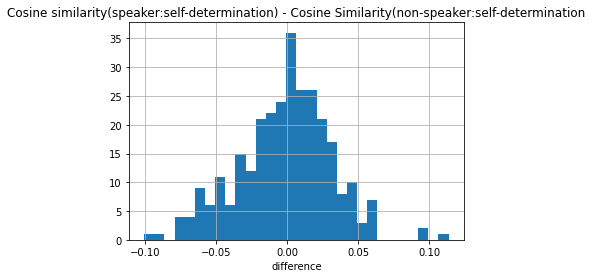

In [ ]:
import matplotlib.pyplot as plt 
merge_df.hist(column = ['difference'], bins = 30)
plt.xlabel('difference')
plt.title('Cosine similarity(speaker:self-determination) - Cosine Similarity(non-speaker:self-determination')